<a href="https://colab.research.google.com/github/PDavila168/supervised-learning/blob/main/proyecto1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
#Import data.
data = '/content/drive/MyDrive/Coding_Dojo_2024_ColabNetworks/Plataforma_PruebasCodingDojo/Data_PlataformaCodingDojo/sales_predictions.csv'
df = pd.read_csv(data)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
df['Item_Fat_Content'] =  df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [ ]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [ ]:
# Conteo de datos nulos
df['Outlet_Size'].isna().sum()

2410

In [ ]:
#llenado de nulos con el valor de la fila anterior
df['Outlet_Size'] = df['Outlet_Size'].fillna (method='ffill')

In [ ]:
#verifación del llenado
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    3912
Small     3321
High      1290
Name: count, dtype: int64

In [ ]:
#llenado de nulos con el peso promedio
a = df['Item_Weight'].mean()
df['Item_Weight'] = df['Item_Weight'].fillna(a)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Proyecto parte 3

In [ ]:
#Proyecto parte 3
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tipo_tienda = df.groupby(['Outlet_Type']) ['Outlet_Identifier'].nunique()

In [ ]:
TipTienda = np.array(tipo_tienda.index)
cnt_tienda = np.array(tipo_tienda.values)

Text(0.5, 1.0, 'Cantidad de Tienda por Tipo de Tienda')

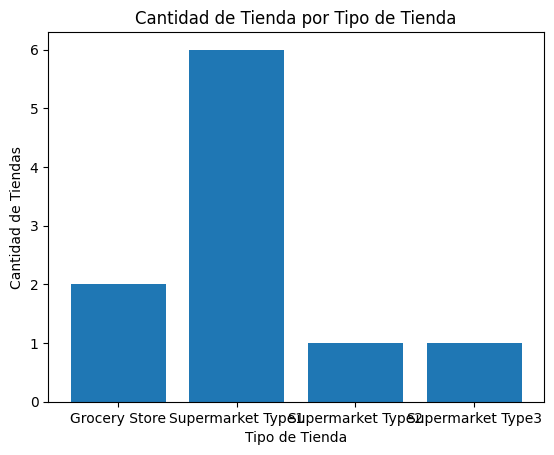

In [ ]:
#'Cantidad de Tienda por Tipo de Tienda'
plt.bar(TipTienda,cnt_tienda)
plt.xlabel('Tipo de Tienda')
plt.ylabel('Cantidad de Tiendas')
plt.title('Cantidad de Tienda por Tipo de Tienda')

In [ ]:
Tipo_tienda_importe = df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
TipTienda = np.array(Tipo_tienda_importe.index)
Ventas = np.array(Tipo_tienda_importe.values)

Text(0.5, 1.0, 'Importe de Ventas por Tipo de Tienda')

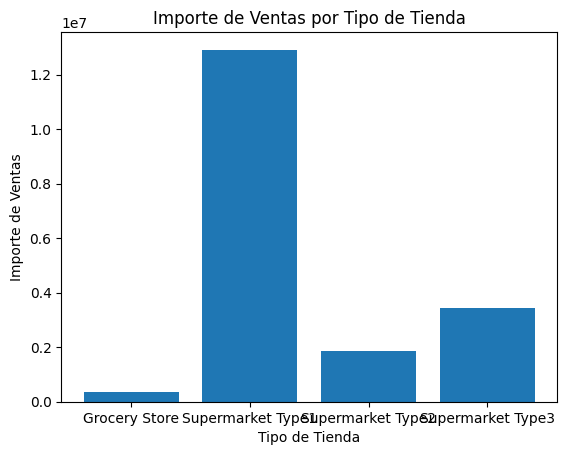

In [ ]:
#'Ventas Tipo de Tienda'
plt.bar(TipTienda,Ventas,)
plt.xlabel('Tipo de Tienda')
plt.ylabel('Importe de Ventas')
plt.title('Importe de Ventas por Tipo de Tienda')
#el tipo de tienda de con mayor venta son los supermercados tipo 1

In [ ]:
# Ventas por tipo de producto - Cantidad
Ventas_Producto = df.groupby(['Item_Type'])['Item_Type'].count()
producto = np.array(Ventas_Producto.index)
Ventas_Producto = np.array(Ventas_Producto.values)

Text(0.5, 1.0, 'Ventas por Producto Cantidad')

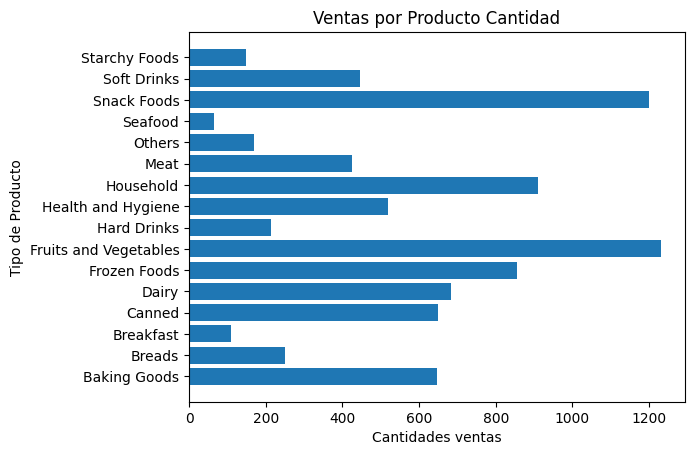

In [ ]:
#'Ventas Tipo de Tienda'
plt.barh(producto,Ventas_Producto)
plt.xlabel('Cantidades ventas')
plt.ylabel('Tipo de Producto')
plt.title('Ventas por Producto Cantidad')

# PREPROCESAMIENTO


#se obvian columnas que corresponden a solo datos de registro

In [ ]:
X = df.drop(["Item_Outlet_Sales","Item_Identifier","Outlet_Establishment_Year"],axis=1)
y = df[["Item_Outlet_Sales"]]

In [ ]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [ ]:
X["Outlet_Type"]  = X["Outlet_Type"].replace({'Supermarket Type2':1, 'Supermarket Type3':1, 'Supermarket Type1':1 ,'Grocery Store' : 2 })


In [ ]:
X.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,1
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,1


In [ ]:
X.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB


In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
Xtr_num = X_train.select_dtypes(include=["int64", "float64"])
Xte_num = X_test.select_dtypes(include=["int64", "float64"])

Xtr_num_1 = Xtr_num[["Outlet_Type"]]
Xte_num_1 = Xte_num[["Outlet_Type"]]

Xtr_num   = Xtr_num.drop("Outlet_Type", axis=1)
Xte_num   = Xte_num.drop("Outlet_Type", axis=1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           5966 non-null   float64
 1   Item_Fat_Content      5966 non-null   object 
 2   Item_Visibility       5966 non-null   float64
 3   Item_Type             5966 non-null   object 
 4   Item_MRP              5966 non-null   float64
 5   Outlet_Identifier     5966 non-null   object 
 6   Outlet_Size           5966 non-null   object 
 7   Outlet_Location_Type  5966 non-null   object 
 8   Outlet_Type           5966 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 466.1+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler

sc  = StandardScaler()
Xtr_num_n         = sc.fit_transform(Xtr_num)
Xtr_num_n         = pd.DataFrame(Xtr_num_n)
Xtr_num_n.columns = Xtr_num.columns

Xte_num_n         = sc.transform(Xte_num)
Xte_num_n         = pd.DataFrame(Xte_num_n)
Xte_num_n.columns = Xte_num.columns

In [ ]:
Xtr_cat = X_train.select_dtypes(exclude=["int64", "float64"])
Xte_cat = X_test.select_dtypes(exclude=["int64", "float64"])

In [ ]:
def dummies_cat(X_tt):
  X_cat = pd.DataFrame()

  for nn in list(X_tt.columns):
    dummies = pd.get_dummies(X_tt[nn],  dtype=int)
    X_cat=  pd.concat([X_cat,dummies],axis=1)
  return X_cat

In [ ]:
Xtr_cat_n   = dummies_cat(Xtr_cat)
Xte_cat_n   = dummies_cat(Xte_cat)

In [ ]:
Xtr_num_n.index = Xtr_cat_n.index
Xte_num_n.index = Xte_cat_n.index

In [ ]:
X_train     = pd.concat([Xtr_num_n,Xtr_cat_n,Xtr_num_1], axis=1)
X_test      = pd.concat([Xte_num_n,Xte_cat_n,Xte_num_1], axis=1)

In [ ]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,...,OUT045,OUT046,OUT049,High,Medium,Small,Tier 1,Tier 2,Tier 3,Outlet_Type
1921,-1.234689,1.606681,-0.401895,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,2
655,1.619766,-1.008442,-0.619284,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
2229,-0.015638,-0.227068,-0.202535,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2537,1.524855,1.028038,1.290187,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3528,1.287577,0.515355,0.686853,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.837248,4.316492,-0.042005,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,2
5191,0.635062,1.013011,-1.056288,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
5390,1.109618,-0.917573,1.525729,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
860,1.762133,-0.224287,-0.381136,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.predict(X_test).round()

array([[1327.],
       [ 711.],
       [ 905.],
       ...,
       [1072.],
       [2193.],
       [3971.]])

In [ ]:
y_test

,Item_Outlet_Sales
7503,1743.0644
2957,356.8688
7031,377.5086
1084,5778.4782
856,2356.9320
...,...
443,2133.2232
777,4287.7520
1119,767.0016
3209,642.4970


In [ ]:
print(reg.score(X_test, y_test))

0.5677911878273351


MODELO TREE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
param_grid = [{"max_depth":np.arange(2,37)}
]

In [ ]:
dtc_reg = DecisionTreeRegressor()

In [ ]:
grid_search = GridSearchCV(dtc_reg, param_grid, cv=5,
                           return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36])}],
             return_train_score=True)

In [ ]:
cvres = grid_search.cv_results_
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.426562852824745, {'max_depth': 2})
(0.5199129241075774, {'max_depth': 3})
(0.5719696504888658, {'max_depth': 4})
(0.5827609638754391, {'max_depth': 5})
(0.5823564187475624, {'max_depth': 6})
(0.5674860142238545, {'max_depth': 7})
(0.5450164809959059, {'max_depth': 8})
(0.5158118182604682, {'max_depth': 9})
(0.48376542368635533, {'max_depth': 10})
(0.4503358057973751, {'max_depth': 11})
(0.41550791082173183, {'max_depth': 12})
(0.3800682291704694, {'max_depth': 13})
(0.35119948040015814, {'max_depth': 14})
(0.30174865015740104, {'max_depth': 15})
(0.2598137696152917, {'max_depth': 16})
(0.2509191426621943, {'max_depth': 17})
(0.22843559831382615, {'max_depth': 18})
(0.21860495912524036, {'max_depth': 19})
(0.2050928169973906, {'max_depth': 20})
(0.1766287809842574, {'max_depth': 21})
(0.18988536458376432, {'max_depth': 22})
(0.17509380860481488, {'max_depth': 23})
(0.1728095001169731, {'max_depth': 24})
(0.17715965597247205, {'max_depth': 25})
(0.17579207530486046, {'max_depth': 26})

In [ ]:
dtc_reg = DecisionTreeRegressor(max_depth=12)
dtc_reg.fit(X_train, y_train)
y_pred= reg.predict(X_test)

print(f"score de prueba: {dtc_reg.score(X_train, y_train)}")
print(f"score de test: {dtc_reg.score(X_test, y_test)}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("===========")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)

score de prueba: 0.7431888530349697
score de test: 0.47704373016094304
RMSE: 1100.2790943048078
MSE: 1210614.085364208
MAE: 810.3250135505396
